In [104]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
import random
from random import choice
from sklearn.preprocessing import StandardScaler

# BILLBOARD TOP 100 SONGS

In [10]:
url = "https://www.billboard.com/charts/hot-100?rank=1"

In [11]:
response = requests.get(url)
response.status_code

200

In [12]:
soup = BeautifulSoup(response.content, "html.parser")

In [13]:
title = []

num_iter = len(soup.select("span.chart-element__information__song"))

for i in range(num_iter):
    title.append(soup.select("span.chart-element__information__song")[i].get_text())


print(title)

['My Universe', 'Stay', 'Industry Baby', 'Way 2 Sexy', 'Fancy Like', 'Bad Habits', 'Good 4 U', 'Kiss Me More', 'Knife Talk', 'Levitating', 'Essence', 'Save Your Tears', 'Montero (Call Me By Your Name)', 'Shivers', 'Heat Waves', 'Need To Know', 'Girls Want Girls', 'You Right', "Beggin'", 'Wockesha', "If I Didn't Love You", 'Take My Breath', 'Fair Trade', 'Thats What I Want', 'Traitor', 'Cold Beer Calling My Name', 'Chasing After You', 'Bad Morning', 'Pepas', 'Deja Vu', 'Happier Than Ever', 'Your Heart', 'Leave The Door Open', 'Hurricane', 'A-O-K', 'Butter', 'On My Side', 'Too Easy', 'Leave Before You Love Me', 'No Where', 'Peaches', 'Family Ties', "Memory I Don't Mess With", 'Late At Night', 'Things A Man Oughta Know', 'Cold Heart (PNAU Remix)', 'Meet Me At Our Spot', 'Life Support', 'I Was On A Boat That Day', 'Love Nwantiti (Ah Ah Ah)', 'Wild Side', 'Whole Lotta Money', 'Hold Me Down', 'Champagne Poetry', 'Buy Dirt', 'Have Mercy', 'Love Again', 'Nevada', '50 Shots', 'No Friends In The

In [14]:
artist = []

num_iter = len(soup.select("span.chart-element__information__artist"))

for i in range(num_iter):
    artist.append(soup.select("span.chart-element__information__artist")[i].get_text())

print(artist)

['Coldplay x BTS', 'The Kid LAROI & Justin Bieber', 'Lil Nas X & Jack Harlow', 'Drake Featuring Future & Young Thug', 'Walker Hayes', 'Ed Sheeran', 'Olivia Rodrigo', 'Doja Cat Featuring SZA', 'Drake Featuring 21 Savage & Project Pat', 'Dua Lipa', 'Wizkid Featuring Justin Bieber & Tems', 'The Weeknd & Ariana Grande', 'Lil Nas X', 'Ed Sheeran', 'Glass Animals', 'Doja Cat', 'Drake Featuring Lil Baby', 'Doja Cat & The Weeknd', 'Maneskin', 'Moneybagg Yo', 'Jason Aldean & Carrie Underwood', 'The Weeknd', 'Drake Featuring Travis Scott', 'Lil Nas X', 'Olivia Rodrigo', 'Jameson Rodgers Featuring Luke Combs', 'Ryan Hurd With Maren Morris', 'YoungBoy Never Broke Again', 'Farruko', 'Olivia Rodrigo', 'Billie Eilish', 'Joyner Lucas & J. Cole', 'Silk Sonic (Bruno Mars & Anderson .Paak)', 'Kanye West', 'Tai Verdes', 'BTS', 'YoungBoy Never Broke Again', 'Gunna & Future', 'Marshmello X Jonas Brothers', 'YoungBoy Never Broke Again', 'Justin Bieber Featuring Daniel Caesar & Giveon', 'Baby Keem & Kendrick 

In [15]:
music = pd.DataFrame({'title': title, 'artists':artist})
music

,title,artists
0,My Universe,Coldplay x BTS
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,Way 2 Sexy,Drake Featuring Future & Young Thug
4,Fancy Like,Walker Hayes
...,...,...
95,Pipe Down,Drake
96,Papi's Home,Drake
97,Chosen,Blxst & Tyga Featuring Ty Dolla $ign
98,Toxic Punk,YoungBoy Never Broke Again


# Scrapping another top 100 form another data source

In [16]:
url2 = "https://www.elportaldemusica.es/lists/top-100-canciones/2021/35"

In [17]:
response2 = requests.get(url2)
response2.status_code

200

In [18]:
soup2 = BeautifulSoup(response2.content, "html.parser")

In [20]:
title2 = []
artist2 = []

for title in soup2.select('div.name'):
    title = title.get_text()
    title = title.strip()
    title = title.rstrip("\n")
    title2.append(title)

for artist in soup2.select('div.related'):
    artist = artist.get_text()
    artist= artist.strip()
    artist = artist.rstrip("\n")
    artist2.append(artist)

print(title2)
print(artist2)

['Mon Amour (remix)', 'PEPAS', 'Todo De Ti', 'CÚRAME', 'VOLVÍ', 'Tiroteo Remix', 'VOLANDO (REMIX)', 'Beba Qué Quieres Que Haga', 'MON AMOUR', 'Qué Más Pues?', 'PARÍS', 'Loco', 'LA HISTORIA', 'DIABLITA REMIX', 'YONAGUNI', 'In Da Getto', 'Stay', 'Pareja Del Año ft Myke Towers', 'MIÉNTEME', 'La Niña de la Escuela', 'YATE', '911 (REMIX)', 'ALMAS GEMELAS', 'AM (REMIX)', 'Fulanito', 'TRANQUILÍSIMO', 'RAKATA', 'FLAMENCO Y BACHATA', 'Bad Habits', 'ELLA', 'Juramento eterno de sal', 'Libertad', 'CHUCKY73: BZRP MUSIC SESSIONS, VOL. 43', 'Tú Me Dejaste De Querer', 'NICKY JAM: BZRP MUSIC SESSIONS, VOL. 41', "BEGGIN'", 'YAMEFUI', 'LA BOTELLA', 'INDUSTRY BABY', 'En Mi Cuarto', 'Cancion Bonita', 'MALBEC', 'Sobrio', 'INGOBERNABLE', 'BUSCATE OTRO', 'ENTRE NOSOTROS', 'Loquita', 'KESI remix', 'RAPIDO', 'FIEL (REMIX)', 'Vida De Rico', '23 PREGUNTAS', 'POBLADO', 'Save Your Tears', 'DAKITI', 'Bésame ft Myke Towers', 'Solo', 'Un beso de improviso', 'MONTERO (Call Me By Your Name)', 'WOW WOW', 'MILLONES', 'Goo

In [21]:
title2 = []
artist2 = []

for title in soup2.select('div.name'):
    title = title.get_text()
    title = title.strip()
    title = title.rstrip("\n")
    title2.append(title)

for artist in soup2.select('div.related'):
    artist = artist.get_text()
    artist= artist.strip()
    artist = artist.rstrip("\n")
    artist2.append(artist)

print(title2)
print(artist2)

['Mon Amour (remix)', 'PEPAS', 'Todo De Ti', 'CÚRAME', 'VOLVÍ', 'Tiroteo Remix', 'VOLANDO (REMIX)', 'Beba Qué Quieres Que Haga', 'MON AMOUR', 'Qué Más Pues?', 'PARÍS', 'Loco', 'LA HISTORIA', 'DIABLITA REMIX', 'YONAGUNI', 'In Da Getto', 'Stay', 'Pareja Del Año ft Myke Towers', 'MIÉNTEME', 'La Niña de la Escuela', 'YATE', '911 (REMIX)', 'ALMAS GEMELAS', 'AM (REMIX)', 'Fulanito', 'TRANQUILÍSIMO', 'RAKATA', 'FLAMENCO Y BACHATA', 'Bad Habits', 'ELLA', 'Juramento eterno de sal', 'Libertad', 'CHUCKY73: BZRP MUSIC SESSIONS, VOL. 43', 'Tú Me Dejaste De Querer', 'NICKY JAM: BZRP MUSIC SESSIONS, VOL. 41', "BEGGIN'", 'YAMEFUI', 'LA BOTELLA', 'INDUSTRY BABY', 'En Mi Cuarto', 'Cancion Bonita', 'MALBEC', 'Sobrio', 'INGOBERNABLE', 'BUSCATE OTRO', 'ENTRE NOSOTROS', 'Loquita', 'KESI remix', 'RAPIDO', 'FIEL (REMIX)', 'Vida De Rico', '23 PREGUNTAS', 'POBLADO', 'Save Your Tears', 'DAKITI', 'Bésame ft Myke Towers', 'Solo', 'Un beso de improviso', 'MONTERO (Call Me By Your Name)', 'WOW WOW', 'MILLONES', 'Goo

In [22]:
music2 = pd.DataFrame({'title': title2, 'artists':artist2})

In [23]:
final_music = pd.concat([music, music2])
final_music

,title,artists
0,My Universe,Coldplay x BTS
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,Way 2 Sexy,Drake Featuring Future & Young Thug
4,Fancy Like,Walker Hayes
...,...,...
95,SE LE VE,SECH / DALEX / RICH MUSIC LTD / JUSTIN QUILES ...
96,Bebé,Camilo & El Alfa
97,Happier Than Ever,Billie Eilish
98,COLORÍN COLORADO,Justin Quiles


In [29]:
final_music = final_music.reset_index()

In [31]:
final_music = final_music.drop(['index'], axis=1)

In [32]:
final_music

,title,artists
0,My Universe,Coldplay x BTS
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,Way 2 Sexy,Drake Featuring Future & Young Thug
4,Fancy Like,Walker Hayes
...,...,...
195,SE LE VE,SECH / DALEX / RICH MUSIC LTD / JUSTIN QUILES ...
196,Bebé,Camilo & El Alfa
197,Happier Than Ever,Billie Eilish
198,COLORÍN COLORADO,Justin Quiles


# SPOTIPY API

In [34]:
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = '2ccfc9245cd046ffa717955ce67f7829',
                                       client_secret = 'ee015a82d7894239b37bd8986a8fdbd8'))

In [35]:
playlist = sp.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")

In [36]:
for value in range(5):
    print(playlist['items'][value]['track']['uri'])

spotify:track:33xMbeHzmWd6Od0BmLZEUs
spotify:track:3UnyplmZaq547hwsfOR5yy
spotify:track:1w8QCSDH4QobcQeT4uMKLm
spotify:track:7J9mBHG4J2eIfDAv5BehKA
spotify:track:1VZedwJj1gyi88WFRhfThb


In [38]:
uris_list = list()

while playlist['next']:
    
    for uris in range(len(playlist['items'])):
        uris_list.append(playlist['items'][uris]['track']['uri'])

    playlist = sp.next(playlist)

## All the audio features

In [ ]:
total_audio_features = list()

for uri in (uris_list):
    audio_features = sp.audio_features(uri)
    if audio_features != [None]:
        total_audio_features.append(list(audio_features[0].values()))

In [ ]:
total_audio_features_df = pd.DataFrame(data = total_audio_features, columns = list(audio_features[0].keys()))

# Audio features and name songs

In [40]:

def audio_features_and_songs():

    playlist = sp.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")

    songs = list()
    columns = ['song', 'artist']
    audio_columns = list(sp.audio_features(playlist['items'][0]['track']['uri'])[0].keys())

    for column in audio_columns:
        columns.append(column)

    counter = 0

    while playlist['next']:

        for song in range(len(playlist['items'])):

            song_data = list()
            song_name = playlist['items'][song]['track']['name']
            artist_name = playlist['items'][song]['track']['artists'][0]['name']
            song_features = sp.audio_features(playlist['items'][song]['track']['uri'])

            if song_features != [None]:
                song_data.append(song_name)
                song_data.append(artist_name)
                for feature in list(song_features[0].values()):
                    song_data.append(feature)
                songs.append(song_data)

        playlist = sp.next(playlist)

        counter += 1

    return songs, columns

songs_data, songs_features = audio_features_and_songs()

Expected id of type track but found type 100+Amazing+Bass+Lines spotify:local:::100+Amazing+Bass+Lines:785
Expected id of type track but found type Alabama+Shakes+performing+Don%27t+Wanna+Fight+Live+on+KCRW spotify:local:::Alabama+Shakes+performing+Don%27t+Wanna+Fight+Live+on+KCRW:251
Expected id of type track but found type Anderson+East+-+Satisfy+Me+-+3_15_2015+-+Riverview+Bungalow%2C+Austin%2C+TX spotify:local:::Anderson+East+-+Satisfy+Me+-+3_15_2015+-+Riverview+Bungalow%2C+Austin%2C+TX:164
Expected id of type track but found type Art+Of+Sleeping+cover+Drake+%27Hotline+Bling%27+for+Like+A+Version spotify:local:::Art+Of+Sleeping+cover+Drake+%27Hotline+Bling%27+for+Like+A+Version:281
Expected id of type track but found type Bahamas+-+Stronger+Than+That+%28Buzzsession%29 spotify:local:::Bahamas+-+Stronger+Than+That+%28Buzzsession%29:172
Expected id of type track but found type CHANSON+_+RE%CC%81PLIQUES+DE+FILMS+%28AVEC+MIRO+BELZIL%29 spotify:local:::CHANSON+_+RE%CC%81PLIQUES+DE+FILMS+%

In [76]:
songs_features_df = pd.DataFrame(songs_data, columns = songs_features)


In [92]:
songs_features_df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,Nosaj Thing,0.310,0.445,7,-13.355,0,0.0863,0.09400,0.067800,0.1130,0.1220,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,The Doors,0.419,0.565,5,-11.565,1,0.0347,0.13700,0.337000,0.1280,0.6480,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,Radiohead,0.354,0.302,9,-13.078,1,0.0326,0.59000,0.070900,0.1110,0.2230,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4
3,7 Element,Vitas,0.727,0.785,5,-6.707,0,0.0603,0.32500,0.126000,0.3100,0.9600,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4
4,#9 Dream,R.E.M.,0.571,0.724,0,-5.967,1,0.0260,0.02310,0.003110,0.0919,0.3850,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,Concert of Wolwes In Canada's Forests,Natural Sounds,0.167,0.110,11,-27.323,0,0.0489,0.99000,0.895000,0.1560,0.0378,87.755,audio_features,74lCVPIg04nxxalNsC2r6H,spotify:track:74lCVPIg04nxxalNsC2r6H,https://api.spotify.com/v1/tracks/74lCVPIg04nx...,https://api.spotify.com/v1/audio-analysis/74lC...,371067,3
9814,One Dance,Drake,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.3510,0.3710,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4
9815,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,0.663,0.713,7,-6.647,0,0.1120,0.03530,0.000008,0.0843,0.6900,101.965,audio_features,17Fd6Yb7mSbinKG8LoWfFl,spotify:track:17Fd6Yb7mSbinKG8LoWfFl,https://api.spotify.com/v1/tracks/17Fd6Yb7mSbi...,https://api.spotify.com/v1/audio-analysis/17Fd...,197933,4
9816,Work,Rihanna,0.725,0.534,11,-6.238,1,0.0946,0.07520,0.000000,0.0919,0.5580,91.974,audio_features,14WWzenpaEgQZlqPq2nk4v,spotify:track:14WWzenpaEgQZlqPq2nk4v,https://api.spotify.com/v1/tracks/14WWzenpaEgQ...,https://api.spotify.com/v1/audio-analysis/14WW...,219320,4


In [43]:
# exporting the df

songs_features_df.to_csv('songs_data_spotipy.csv', index = False)

In [94]:
songs_features_num = songs_features_df.drop(columns = ['mode', 'time_signature']).select_dtypes(include = np.number).dropna()
scaler = StandardScaler().fit(songs_features_num)
songs_features_num_array = scaler.transform(songs_features_num)
songs_features_num_scaled = pd.DataFrame(songs_features_num_array, columns = songs_features_num.columns)

In [95]:
songs_features_num_scaled

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.617904,-0.734778,0.500880,-1.201975,0.166272,-0.628004,-0.195673,-0.483333,-1.465272,-0.872177,-0.922339
1,-0.931323,-0.223746,-0.055855,-0.785666,-0.460966,-0.492201,0.831157,-0.391618,0.655441,1.075144,-0.400048
2,-1.340752,-1.343759,1.057615,-1.137552,-0.486493,0.938475,-0.183849,-0.495561,-1.058063,0.116615,0.138798
3,1.008743,0.713147,-0.055855,0.344183,-0.149778,0.101546,0.026323,0.721187,1.913354,0.321945,0.204219
4,0.026112,0.453372,-1.447693,0.516289,-0.566721,-0.851923,-0.442425,-0.612345,-0.404916,-0.127091,0.532538
...,...,...,...,...,...,...,...,...,...,...,...
9813,-2.518649,-2.161411,1.614350,-4.450583,-0.288354,2.201765,2.959580,-0.220417,-1.804747,-1.137022,1.605498
9814,1.411873,0.006219,-1.169325,0.535127,-0.236084,-0.900117,-0.438153,0.971874,-0.461360,-0.571670,-0.674457
9815,0.605612,0.406528,0.500880,0.358138,0.478675,-0.813392,-0.454259,-0.658814,0.824775,-0.642156,-0.397434
9816,0.996145,-0.355762,1.614350,0.453261,0.267165,-0.687379,-0.454288,-0.612345,0.292581,-0.990095,-0.150014


# CLUSTERS

In [96]:
inertia_list = list()
clusters = list(range(2,10))

for c in clusters:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(songs_features_num_scaled)
    inertia_list.append(round(kmeans.inertia_, 2))

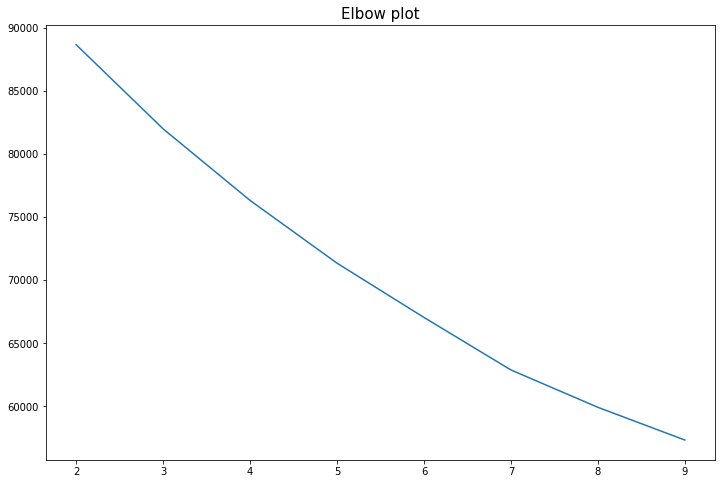

In [97]:
fig = plt.figure(figsize = (12, 8))
plt.plot(clusters, (inertia_list)) 
plt.title('Elbow plot', fontsize = 15)
plt.show()

## SELECTING THE FINAL NUMBER OF CLUSTERS

In [99]:
final_kmeans = KMeans(n_clusters=4, random_state=0).fit(songs_features_num_scaled)
songs_features_df['cluster'] = kmeans.predict(songs_features_num_scaled)

In [100]:
# CREATING DATASETS WITH CLUSTERS
cluster1 = songs_features_df[songs_features_df.cluster == 1]
cluster2 = songs_features_df[songs_features_df.cluster == 2]
cluster3 = songs_features_df[songs_features_df.cluster == 3]

## SONG FEATURES FUNCTION

In [101]:
def get_song_features(user_song):

    song = sp.search(q = user_song, type = "track", limit = 1)
    song_uri = song['tracks']['items'][0]['uri']
    song_features = sp.audio_features(song_uri)[0]
    values = [list(song_features.values())]
    columns = list(song_features.keys())

    return pd.DataFrame(data = values, columns = columns)

## SONG CLUSTER FUNCTION

In [102]:
def get_cluster(song_features):
    song_features_numerical = song_features.drop(columns = ['mode', 'time_signature']).select_dtypes(include = np.number)
    return list(kmeans.predict(song_features_numerical))[0]

# SONG RECOMMENDER

In [106]:
def get_recommendation():

    user_song = input('GIVE ME A SONG: ')

    if user_song in title:

        songs_titles_copy = title
        songs_titles_copy.remove(user_song)
        selected_song = random.choice(songs_titles_copy)

    else:
        selected_song = 'No recommendation'

    if selected_song != 'No recommendation':
        return f'Your recommendation is: {selected_song}'

    else:

        condition = True

        while condition:

            condition = False
        
            try:
                user_song_features = get_song_features(user_song)
            except IndexError:
                condition = True
                user_song =  input('THAT SONG DOES NOT EXIST. PLEASE SELECT ANOTHER ONE: ')

        user_song_cluster = get_cluster(user_song_features)

        if user_song_cluster == 1:
            titles = list(cluster1['song'].unique())
            print(f'Your recommendation is: {choice(titles)}')

        elif user_song_cluster == 2:
            titles = list(cluster2['song'].unique())
            print(f'Your recommendation is: {choice(titles)}')

        else:
            titles = list(cluster3['song'].unique())
            print(f'Your recommendation is {choice(titles)}')

get_recommendation()

Your recommendation is Chop Suey!
